In [4]:
import numpy as np
import matplotlib.pylab as plt
from glob import glob
import librosa
import librosa.display
import seaborn as sns

In [5]:
# Load an audio file
audio_files_east_coast = glob('../eurovision/audio/east_coast/*.mp3')
audio_files_west_coast = glob('../eurovision/audio/west_coast/*.mp3')

In [43]:
def compute_mfccs(audio_path, n_mfcc=20):
    # Load audio file
    y, sr = librosa.load(audio_path)
    
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Average over time to get aggregated MFCCs -> Shape for one file: (20, )
    avg_mfccs = np.mean(mfccs, axis=1)

    return avg_mfccs

def plot_mfcc_distributions(mfccs_list_1, mfccs_list_2, legend):
    plt.figure(figsize=(16, 8))
    sns.histplot(mfccs_list_1, bins=20, kde=True, color='teal', alpha=0.5)
    sns.histplot(mfccs_list_2, bins=20, kde=True, color='green', alpha=0.5)
    plt.xlabel('MFCC Values')
    plt.ylabel('Frequency')
    plt.legend(labels=legend)
    plt.title('East Coast vs West Coast MFCC distribution')
    plt.show()

In [40]:
# List to store aggregated MFCCs and labels
avg_mfccs_list_east_coast = []

for file in audio_files_east_coast:
    avg_mfccs = compute_mfccs(file)
    avg_mfccs_list_east_coast.append(avg_mfccs)

In [41]:
# List to store aggregated MFCCs and labels
avg_mfccs_list_west_coast = []
labels_west_coast = []

for file in audio_files_west_coast:
    mfccs = compute_mfccs(file)
    avg_mfccs_list_west_coast.append(mfccs)
    labels_west_coast.append(file)

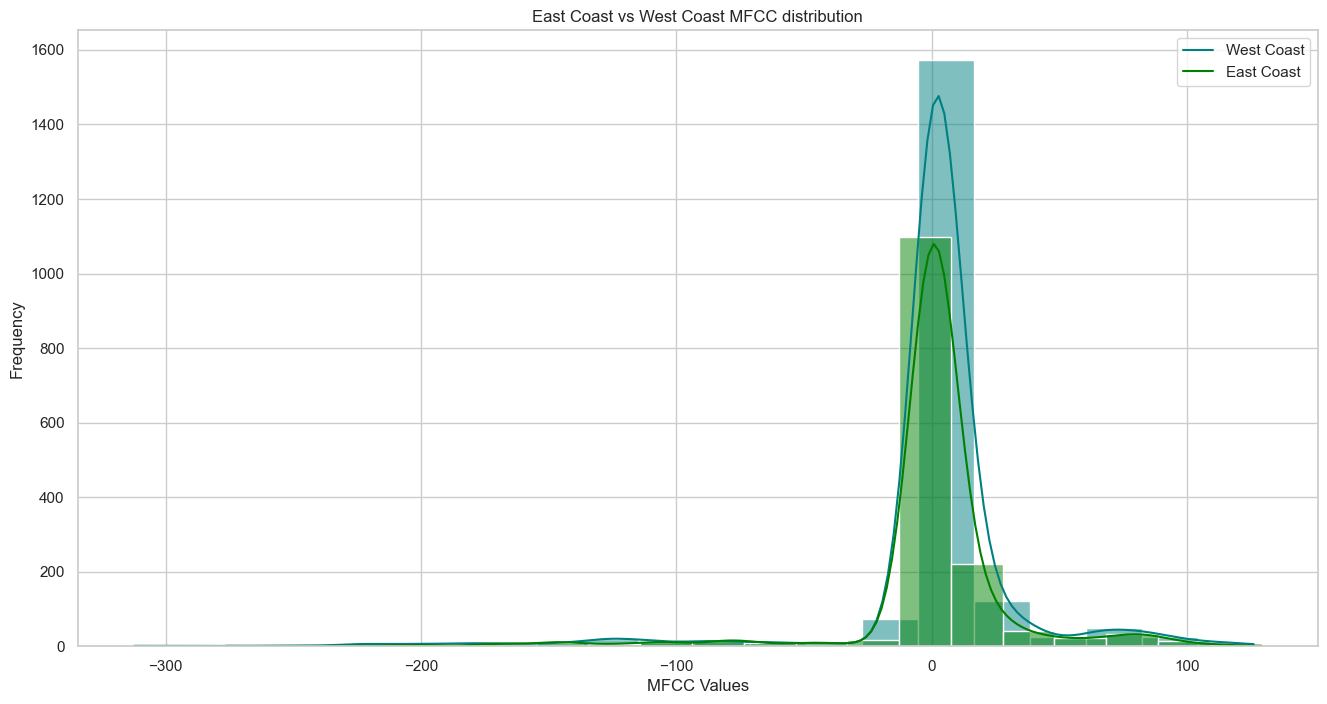

In [44]:
# Flatten the list of MFCC arrays into a single array
flattened_mfccs_east_coast = np.concatenate(avg_mfccs_list_east_coast)
flattened_mfccs_west_coast = np.concatenate(avg_mfccs_list_west_coast)

plot_mfcc_distributions(flattened_mfccs_west_coast, flattened_mfccs_east_coast, ['West Coast', 'East Coast'])